In [1]:
"""=============================================================================
    1) Tra XUÔI bảng Z (slide #137)
        a) P(Z < z)
        b) P(z < Z)
        c) P(a < Z < b)

    2) Tra NGƯỢC bảng Z (slide #139)
        d) Xs suy ra giá trị z-score
============================================================================="""

'''-----------------------------------------------------------------------------
   Hàm tính xác suất theo phân phối Z (tra XUÔI bảng Z)
-----------------------------------------------------------------------------'''
def zDistribution(side, lower, upper):
    import scipy.stats as st

    side = side.lower()
    
    if (side == 'left'):
        p = st.norm.cdf(lower)
    elif (side == 'right'):
        p = 1 - st.norm.cdf(upper)
    else:
        p = st.norm.cdf(upper) - st.norm.cdf(lower)       
    return (p)

'''-----------------------------------------------------------------------------
   Hàm tìm z-score khi biết xác suất (tra NGƯỢC bảng Z)
-----------------------------------------------------------------------------'''
def p2z(side, p):
    import scipy.stats as st

    side = side.lower()
    
    if (side == 'left'):
        z = st.norm.ppf(p)
    elif (side == 'right'):
        z = p2z('left', 1 - p)
    else:
        z = p2z('left', 0.5 + (p / 2))
    return (z)

'''-----------------------------------------------------------------------------
   Hàm hiển thị xác suất
-----------------------------------------------------------------------------'''
def displayZ(side, lower, upper, p):
    side = side.lower()
    lower = str(lower)
    upper = str(upper)
    if (side == 'left'):
        s = 'P(Z < ' + lower + ') = '
    elif (side == 'right'):
        s = 'P(' + upper + ' < Z) = '
    else:
        s = 'P(' + lower + ' < Z < ' + upper + ') = '
    return (s + str('%.4f' %p))



print('---------------------------------')
print('1) Tra XUÔI bảng Z')
print('---------------------------------')
import numpy as np

side  = np.array(['left', 'left', '2-side', '2-side', 'right', 'right'])
lower = np.array([1.2, -0.71, 0, -1.57, None, None])
upper = np.array([None, None, 0.83, 0, 0.44, -0.23])

for i in range(len(side)):
    p = zDistribution(side[i], lower[i], upper[i])
    print(displayZ(side[i], lower[i], upper[i], p))
   
print('---------------------------------')
print('2) Tra NGƯỢC bảng Z')
print('---------------------------------')
side = np.array(['left', 'left', '2-side', '2-side', 'right'])
p    = np.array([0.2119, 0.9948, 0.9030, 0.2052, 0.6915])
for i in range(len(side)):
    z = p2z(side[i], p[i])
    print('p = %.4f' %p[i], '--> z-score = %.2f' %z)

---------------------------------
1) Tra XUÔI bảng Z
---------------------------------
P(Z < 1.2) = 0.8849
P(Z < -0.71) = 0.2389
P(0 < Z < 0.83) = 0.2967
P(-1.57 < Z < 0) = 0.4418
P(0.44 < Z) = 0.3300
P(-0.23 < Z) = 0.5910
---------------------------------
2) Tra NGƯỢC bảng Z
---------------------------------
p = 0.2119 --> z-score = -0.80
p = 0.9948 --> z-score = 2.56
p = 0.9030 --> z-score = 1.66
p = 0.2052 --> z-score = 0.26
p = 0.6915 --> z-score = -0.50



Số liệu thống kê:
 DescribeResult(nobs=1000, minmax=(498080, 501316), mean=499994.83, variance=238061.2043043043, skewness=-0.19307729544452706, kurtosis=0.008489919507938204)
P(X = 7) = 0.0000
P(X = 7) = 0.0000 (PYTHON)


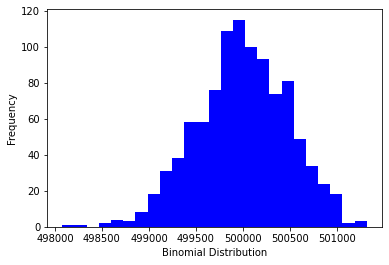

In [7]:
"""=============================================================================
    Slides #35 --> #37
        n   : số lần thí nghiệm
        p   : xác suất thành công
        size: số mẫu thử
============================================================================="""
import math
import seaborn as sns

from scipy.stats import binom
from scipy.stats import stats

# n đủ lớn, p = 0.5 ==> xấp xỉ phân phối chuẩn
n    = 1000000
p    = 0.5
size = 1000
probs = [0.3, 0.5, 0.8] 
# data_binom = [binom.rvs(n = n, p = p, size = size) for p in probs]
data_binom = binom.rvs(n = n, p = p, size = size)

ax = sns.distplot(data_binom, kde = False, color = 'blue',
                  hist_kws = {'linewidth': 15, 'alpha':1})
ax.set(xlabel = 'Binomial Distribution', ylabel = 'Frequency')

print('\nSố liệu thống kê:\n', stats.describe(data_binom))

# Thí nghiệm tung đồng xu: mặt sấp hoặc mặt ngửa
#    - Giả sử tung một đồng xu 'công bằng' 12 lần. Tính xác suất để có 7 lần ngửa.
#
#    P_x_k = n!/(k!)(n - k)! x p^k x (1 - p)^(n - k)

k = 7
C_n_k = math.factorial(n)/(math.factorial(k) * math.factorial(n - k))
P_X_k =  C_n_k * math.pow(p, k) * math.pow(1 - p, n - k)

print('P(X = 7) = %.4f' %P_X_k)

# Dùng hàm của python
print('P(X = 7) = %.4f (PYTHON)' %binom.pmf(k, n, p, loc = 0))
